In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant Village Dataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 3616 files belonging to 17 classes.
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant Village Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3640 files belonging to 17 classes.


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/trained_plant_disease_model.keras')
test_loss, test_accuracy = model.evaluate(test_set)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accuracy: 0.9302 - loss: 0.2260
Test Accuracy: 93.6 %


In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/trained_plant_disease_model.keras')

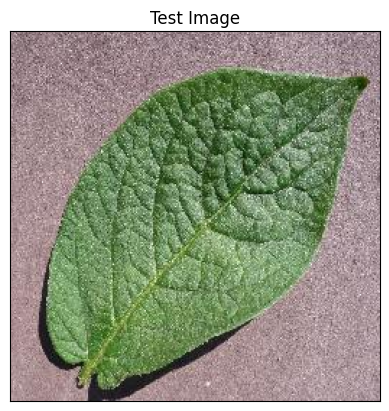

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Plant Village Dataset/test/Potato___healthy/ad9b6cf4-e065-496d-91c7-5713ce14e19e___RS_HL 1926.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [ ]:
print(predictions)

[[1.7342433e-08 1.6352034e-09 1.3174493e-08 3.2865524e-10 6.2892409e-06
  5.7169847e-02 1.9841483e-01 1.3223170e-06 2.1835340e-06 1.9523304e-07
  2.1035412e-07 8.0181198e-06 1.1138477e-04 7.2327000e-01 1.3460062e-08
  6.3194547e-09 2.1015633e-02]]


In [ ]:

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

13


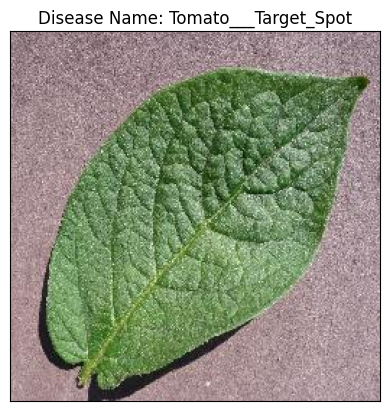

In [ ]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'sns' is not defined

<Figure size 1400x1200 with 0 Axes>